In [106]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [27]:
users = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [29]:
# It appears that, for some, the last_session_creation_time does not exist. These 3177 values can be converted to a nan.

users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['invited_by_user_id'].fillna(0, inplace=True)

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [36]:
users['duration'] = users['last_session_creation_time'] - users['creation_time']

users.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,8823
mean,6000.50000,0.249500,0.149333,141.884583,3188.691333,59 days 05:19:53.471608296
std,3464.24595,0.432742,0.356432,124.056723,3869.027693,144 days 04:07:55.235611054
min,1.00000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,3000.75000,0.000000,0.000000,29.000000,0.000000,0 days 00:00:00
50%,6000.50000,0.000000,0.000000,108.000000,875.000000,1 days 00:00:00
75%,9000.25000,0.000000,0.000000,238.250000,6317.000000,20 days 00:00:00
max,12000.00000,1.000000,1.000000,416.000000,11999.000000,729 days 00:00:00


In [38]:
user_eng = pd.read_csv('takehome_user_engagement.csv')
user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [40]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [47]:
user_join = user_eng.groupby('user_id').count()
user_join = user_join.reset_index()
user_join.head()

,user_id,time_stamp,visited
0,1,1,1
1,2,14,14
2,3,1,1
3,4,1,1
4,5,1,1


In [51]:
users = users.merge(user_join, left_on='object_id', right_on='user_id', how='left')
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'duration', 'user_id', 'time_stamp', 'visited'],
      dtype='object')

<AxesSubplot: >

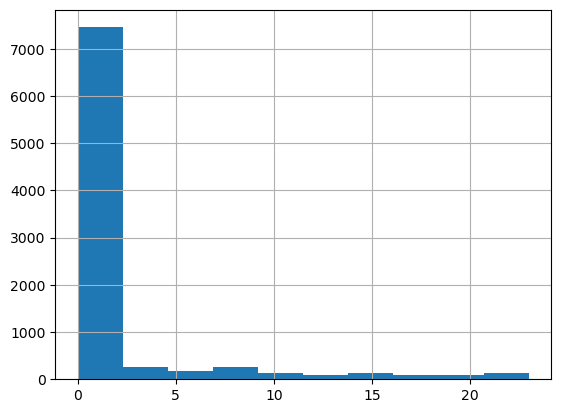

In [63]:
users['duration'].astype('timedelta64[M]').hist()

<AxesSubplot: >

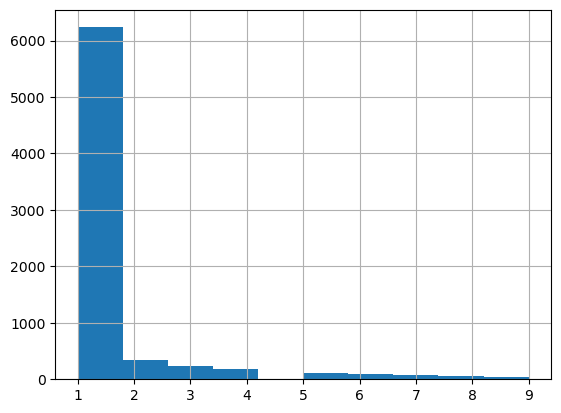

In [68]:
users[users['visited'] < 10]['visited'].hist()

In [72]:
print('Users that only visited once:', users[users['visited'] == 1]['visited'].count())
print('Percentage of users that only visited once:', users[users['visited'] == 1]['visited'].count() / users['visited'].count())

Users that only visited once: 6235
Percentage of users that only visited once: 0.7066757338773659


In [91]:
invite_data = pd.DataFrame(users.groupby('invited_by_user_id')['invited_by_user_id'].count())
invite_data.rename(columns={'invited_by_user_id': 'invite_count'}, inplace=True)
invite_data.reset_index(inplace=True)
users = users.merge(invite_data, left_on='object_id', right_on='invited_by_user_id', how='left')
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id_x',
       'duration', 'user_id', 'time_stamp', 'visited', 'invited_by_user_id_y',
       'invite_count'],
      dtype='object')

In [93]:
users['invite_count'].fillna(0, inplace=True)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id_x,duration,user_id,time_stamp,visited,invited_by_user_id_y,invite_count
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0 days,1.0,1.0,1.0,NaN,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136 days,2.0,14.0,14.0,NaN,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0 days,3.0,1.0,1.0,3.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1 days,4.0,1.0,1.0,NaN,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5 days,5.0,1.0,1.0,NaN,0.0


<AxesSubplot: >

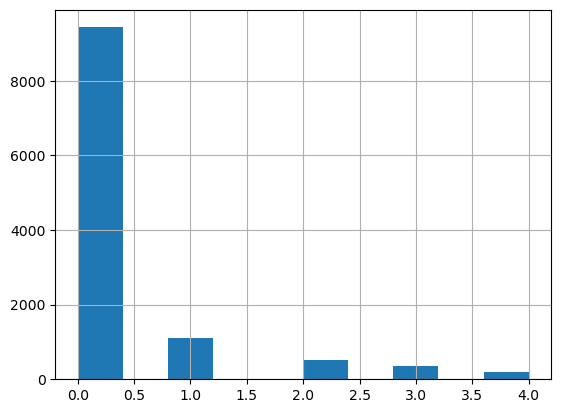

In [96]:
users[users['invite_count'] < 5]['invite_count'].hist()

In [99]:
users = pd.get_dummies(users, prefix='source', columns=['creation_source'], drop_first=False)

In [102]:
users.corr()['visited']

C:\Users\marcj\AppData\Local\Temp\ipykernel_26544\1137744763.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  users.corr()['visited']


object_id                    -0.009793
opted_in_to_mailing_list      0.004284
enabled_for_marketing_drip    0.002257
org_id                        0.055777
invited_by_user_id_x          0.009841
user_id                      -0.009793
time_stamp                    1.000000
visited                       1.000000
invited_by_user_id_y          0.012997
invite_count                  0.190356
source_GUEST_INVITE           0.037381
source_ORG_INVITE            -0.016058
source_PERSONAL_PROJECTS      0.006635
source_SIGNUP                -0.026776
source_SIGNUP_GOOGLE_AUTH     0.006843
Name: visited, dtype: float64

In [107]:
users['adopted'] = np.nan
for value in tqdm(range(len(users['visited']))):
    if users['visited'][value] >= 3:
        users['adopted'][value] = 1
    else:
        users['adopted'][value] = 0

users.head()

  0%|          | 0/12000 [00:00<?, ?it/s]C:\Users\marcj\AppData\Local\Temp\ipykernel_26544\55281467.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['adopted'][value] = 0
C:\Users\marcj\AppData\Local\Temp\ipykernel_26544\55281467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['adopted'][value] = 1
100%|██████████| 12000/12000 [00:22<00:00, 536.22it/s]


,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id_x,duration,...,time_stamp,visited,invited_by_user_id_y,invite_count,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,1,0,11,10803.0,0 days,...,1.0,1.0,NaN,0.0,1,0,0,0,0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,316.0,136 days,...,14.0,14.0,NaN,0.0,0,1,0,0,0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,0,0,94,1525.0,0 days,...,1.0,1.0,3.0,1.0,0,1,0,0,0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,2013-05-22 08:09:28,0,0,1,5151.0,1 days,...,1.0,1.0,NaN,0.0,1,0,0,0,0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,2013-01-22 10:14:20,0,0,193,5240.0,5 days,...,1.0,1.0,NaN,0.0,1,0,0,0,0,0.0


In [108]:
from sklearn.model_selection import train_test_split

features = ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invite_count', 'source_GUEST_INVITE', 'source_ORG_INVITE', 'source_PERSONAL_PROJECTS', 'source_SIGNUP', 'source_SIGNUP_GOOGLE_AUTH']
X = users[features]
y = users['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [01:09<00:00,  2.40s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.53,0.58,0.58,0.58,0.14
QuadraticDiscriminantAnalysis,0.67,0.55,0.55,0.69,0.15
KNeighborsClassifier,0.80,0.52,0.52,0.74,1.07
GaussianNB,0.81,0.51,0.51,0.74,0.08
PassiveAggressiveClassifier,0.81,0.50,0.50,0.73,0.15
BaggingClassifier,0.81,0.50,0.50,0.73,0.31
LGBMClassifier,0.81,0.50,0.50,0.73,0.79
DecisionTreeClassifier,0.81,0.50,0.50,0.73,0.10
ExtraTreeClassifier,0.81,0.50,0.50,0.73,0.10


In [117]:
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NC_model = NearestCentroid()
NC_score = cross_val_score(NC_model, X, y, cv=10, scoring='accuracy')

QDA_model = QuadraticDiscriminantAnalysis()
QDA_model_params = {
    'reg_param': uniform(),
    'tol': uniform()
}
QDA_clf = RandomizedSearchCV(QDA_model, param_distributions=QDA_model_params, n_iter = 10, cv = 10, scoring='accuracy')
QDA_model_RSCV = QDA_clf.fit(X_train, y_train)
QDA_model_RSCV_score = QDA_model_RSCV.best_estimator_.score(X_test, y_test)

print("Nearest Centroid Score:", NC_score.mean())
print("Quadratic Discriminant Analysis Score:", QDA_model_RSCV_score)

Nearest Centroid Score: 0.7040000000000001
Quadratic Discriminant Analysis Score: 0.8058333333333333


Based on the above code, it is my belief that the factors that will affect user retention the most are invite_count (how many people they've invited), visited (how many times they have visited the login), and duration (the difference between their first login and their latest login).